## Simplified Self Attention without Trainable weights

In [26]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89], # Your
        [0.55, 0.87, 0.66], # Journey
        [0.57, 0.85, 0.64], # Starts
        [0.22, 0.58, 0.33], # with
        [0.77, 0.25, 0.10], # one
        [0.05, 0.80, 0.55] # step
    ]
)

Calculating the attention scores when inputing the journey word here
1. query is input vector embedding  of journey
2. x_i is the every input vector embedding
3. attn_score is the score which defines the value of each input token for "journey" and it is calculated using dot product between the journey and evert input vector embedding token




In [27]:
query = inputs[1] ## which is journey
attn_score = torch.empty(inputs.shape[0]) ## tensor([nan, nan, nan, nan, nan, nan])

for i, x_i in enumerate(inputs):
  attn_score[i] = torch.dot(x_i, query)
print(attn_score)




tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])


[0.9544, ## your

 1.4950, ## journey

1.4754,  ## starts

0.8434, ## with

 0.7070, ## one

1.0865]  ## step


Here we can see the other than Journey itself the attention weight of start is highest.

Lets normalize the attention score to maintain the stability while training the LLM. They will become the attention weights


In [28]:

attent_weights = attn_score/ attn_score.sum()
print(attent_weights)

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])


In [29]:
## softmax does the same thing

def softmax_naive(x):
  return torch.exp(x)/torch.exp(x).sum(dim=0)

attent_weights2 = softmax_naive(attn_score)

print("Attention Weights", attent_weights2)
print("sum", attent_weights2.sum())



Attention Weights tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
sum tensor(1.)


In [30]:
## naive softmax implementation may encounter numerical instablity problems, for large or small input values. Therefor adivsable to use the pytorch softmax

attent_weights3 = torch.softmax(attn_score, dim=0)
print("Attention Weights:", attent_weights3)
print("Sum:", attent_weights3.sum())

Attention Weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [31]:
# now we multiply each inputs to the attention weight to generated a context_vector

query = inputs[1] ## input is journey
context_vec = torch.zeros(query.shape)  ## tensor([0., 0., 0.])
for i, x_i in enumerate(inputs):
  context_vec += attent_weights3[i] * x_i

print(context_vec)

tensor([0.4419, 0.6515, 0.5683])


In [32]:
## now lets calculate the attention weights for each input and calucate the context vector

attn_score = torch.empty(6,6)
for i, x_i in enumerate(inputs):
  for j, x_j in enumerate(inputs):
    attn_score[i,j] = torch.dot(x_i, x_j)

print(attn_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


        your    journey  starts  with    one      step
 your   [0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],

journey [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],

starts  [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],

with    [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],

one     [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],

step    [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]

In [33]:
## for loops are slow so we use matrix multiplication of input matrix and transpose of input matrix

attn_score =  inputs @ inputs.T
print(attn_score)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [34]:
## normalizing the weights
attn_weights = torch.softmax(attn_score, dim=-1) ## -1 becuase normalizing across the columns
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [35]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [36]:
## now calculating the context vectores
all_context_vectors = attn_weights @ inputs
print(all_context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])


## Implement Self Attention with trainable weights

In [37]:
import torch

inputs = torch.tensor(
    [
        [0.43, 0.15, 0.89], # Your
        [0.55, 0.87, 0.66], # Journey
        [0.57, 0.85, 0.64], # Starts
        [0.22, 0.58, 0.33], # with
        [0.77, 0.25, 0.10], # one
        [0.05, 0.80, 0.55] # step
    ]
)

In [38]:
inputs

tensor([[0.4300, 0.1500, 0.8900],
        [0.5500, 0.8700, 0.6600],
        [0.5700, 0.8500, 0.6400],
        [0.2200, 0.5800, 0.3300],
        [0.7700, 0.2500, 0.1000],
        [0.0500, 0.8000, 0.5500]])

In [39]:
x_2= inputs[1]
x_2

tensor([0.5500, 0.8700, 0.6600])

In [40]:
## for model like GPT, input and output dimensions are some
d_in = inputs.shape[1] ## journey
d_out = 2 ## we keep it different for better understanding purpose
print(f"Input_dimension: {d_in}, Output_dimension: 2")

Input_dimension: 3, Output_dimension: 2


In [41]:
## initalizing weight matrices Wq, Wk, Wv

torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out),requires_grad=False )
W_key = torch.nn.Parameter(torch.rand(d_in, d_out),requires_grad=False )
W_value = torch.nn.Parameter(torch.rand(d_in, d_out),requires_grad=False )


In [42]:
print(W_query)
print(W_key)
print(W_value)

Parameter containing:
tensor([[0.2961, 0.5166],
        [0.2517, 0.6886],
        [0.0740, 0.8665]])
Parameter containing:
tensor([[0.1366, 0.1025],
        [0.1841, 0.7264],
        [0.3153, 0.6871]])
Parameter containing:
tensor([[0.0756, 0.1966],
        [0.3164, 0.4017],
        [0.1186, 0.8274]])


In [43]:
## lets compute the query, key and value for the journey
query_2 = x_2 @ W_query
key_2 = x_2 @ W_key
value_2 = x_2 @ W_value
print(query_2)
print(key_2)
print(value_2)

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


In [44]:
## lets obtain all keys and values via matrix multiplication for all inputs
query= inputs @ W_query
keys = inputs @ W_key
value = inputs @ W_value

print(f"query shape: {query.shape}") ## since inputs[6x3] @ W[3x2] = [6x2]

query shape: torch.Size([6, 2])


In [45]:
## lets calculates attention scores
attn_scores = query @ keys.T
print(attn_scores)

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])


In [46]:
### lets normalize the attention scores with softmax function
d_k = keys.shape[-1]  ## 2
attn_weights = torch.softmax(attn_scores/d_k**0.5, dim=-1)
print(attn_weights)


tensor([[0.1551, 0.2104, 0.2059, 0.1413, 0.1074, 0.1799],
        [0.1500, 0.2264, 0.2199, 0.1311, 0.0906, 0.1820],
        [0.1503, 0.2256, 0.2192, 0.1315, 0.0914, 0.1819],
        [0.1591, 0.1994, 0.1962, 0.1477, 0.1206, 0.1769],
        [0.1610, 0.1949, 0.1923, 0.1501, 0.1265, 0.1752],
        [0.1557, 0.2092, 0.2048, 0.1419, 0.1089, 0.1794]])


In [48]:
## why divide by SQRT ? softmax is sensitive to the magnitute of its inputs. When the inputs are large, the difference is more, this cause the softmax output peaky. dot prodcut of Q and K increase the variance, and it increase with increase in dimensions thats why we divide it by sqrt keeps the variance close to 1
## Example
import numpy as np
def compute_variance(dim, num_trials = 100):
  dot_products = []
  scaled_dot_products = []

  for i in range(num_trials):
    q = np.random.randn(dim)
    k = np.random.randn(dim)

    dot_product = np.dot(q,k)
    dot_products.append(dot_product)

    scaled_dot_product = np.dot(q,k)/np.sqrt(dim)
    scaled_dot_products.append(scaled_dot_product)

  ## computing the variance of the dot product
  variance = np.var(dot_products)
  variance_with_scaled_dot_products = np.var(scaled_dot_products)

  return variance, variance_with_scaled_dot_products

dim = 1000
variance, variance_with_scaled_dot_products = compute_variance(dim)
print(f"Variance without scaling: {variance}")
print(f"Variance with scaling: {variance_with_scaled_dot_products}")




Variance without scaling: 1009.7469761409717
Variance with scaling: 1.0097469761409719


In [51]:
## calculating context vectors
context_vector = attn_weights @ value
print(context_vector)


tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]])


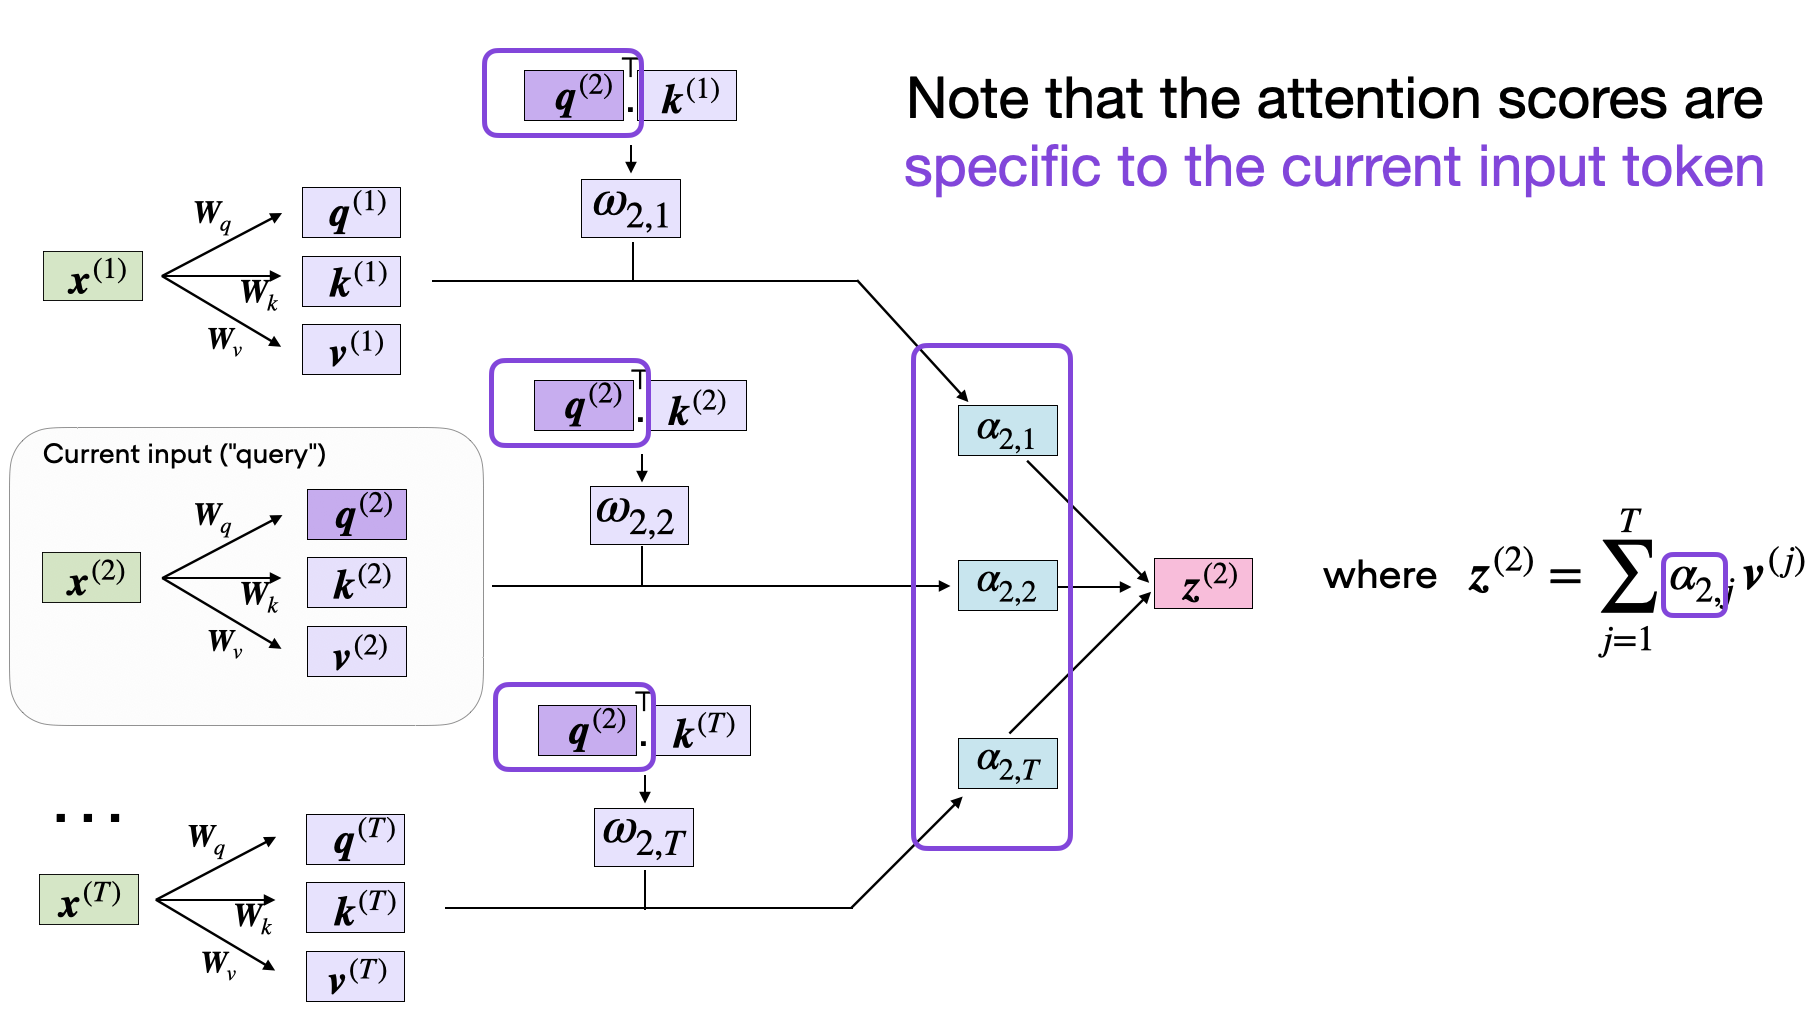

In [54]:
## coding Self attention block

import torch.nn as nn ## fundamental building block of Pytorch
class SelfAttention_v1(nn.Module):

  def __init__(self, d_in, d_out):
    super().__init__()
    self.W_query = nn.Parameter(torch.rand(d_in,d_out))
    self.W_key = nn.Parameter(torch.rand(d_in,d_out))
    self.W_value = nn.Parameter(torch.rand(d_in,d_out))

  def forward(self, x):
    query = x @ self.W_query
    key = x @ self.W_key
    value = x @ self.W_value

    atten_score = query @ key.T
    attn_weights = torch.softmax(atten_score/key.shape[-1]**0.5, dim=-1)
    context_vec = attn_weights @ value
    return context_vec


In [56]:
torch.manual_seed(123)
sa_v1 = SelfAttention_v1(d_in, d_out)
print(sa_v1(inputs))

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)


In [57]:
## instead of manually implementing nn.Parameter, using nn.Linear contribute  to more stable and effective model training

import torch.nn as nn ## fundamental building block of Pytorch
class SelfAttention_v2(nn.Module):

  def __init__(self, d_in, d_out, qkv_bias = False):
    super().__init__()
    self.W_query = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias = qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias = qkv_bias)

  def forward(self, x):
    query = self.W_query(x)
    key = self.W_key(x)
    value = self.W_value(x)

    atten_score = query @ key.T
    attn_weights = torch.softmax(atten_score/key.shape[-1]**0.5, dim=-1)
    context_vec = attn_weights @ value
    return context_vec


In [59]:
torch.manual_seed(123)
sa_v2 = SelfAttention_v2(d_in, d_out)
print(sa_v2(inputs))

tensor([[-0.5337, -0.1051],
        [-0.5323, -0.1080],
        [-0.5323, -0.1079],
        [-0.5297, -0.1076],
        [-0.5311, -0.1066],
        [-0.5299, -0.1081]], grad_fn=<MmBackward0>)
